<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/Hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Giữa kì/Hoa

/content/drive/MyDrive/Colab Notebooks/Giữa kì/Hoa


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/Hoa/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 340 images belonging to 5 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Giữa kì/Hoa/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 114 images belonging to 5 classes.


In [7]:
training_set.class_indices

{'Hoa cúc': 0, 'Hoa hồng': 1, 'Hoa mai': 2, 'Hoa sen': 3, 'Hoa súng': 4}

In [8]:
validation.class_indices

{'Hoa cúc': 0, 'Hoa hồng': 1, 'Hoa mai': 2, 'Hoa sen': 3, 'Hoa súng': 4}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/30
11/11 [==============================] - 157s 14s/step - loss: 7.2852 - accuracy: 0.2324 - val_loss: 1.4619 - val_accuracy: 0.3860
Epoch 2/30
11/11 [==============================] - 62s 6s/step - loss: 1.3498 - accuracy: 0.4029 - val_loss: 1.1965 - val_accuracy: 0.5263
Epoch 3/30
11/11 [==============================] - 66s 6s/step - loss: 1.1682 - accuracy: 0.4912 - val_loss: 1.0081 - val_accuracy: 0.5789
Epoch 4/30
11/11 [==============================] - 71s 6s/step - loss: 0.9900 - accuracy: 0.5971 - val_loss: 0.8181 - val_accuracy: 0.6404
Epoch 5/30
11/11 [==============================] - 62s 6s/step - loss: 0.7273 - accuracy: 0.7324 - val_loss: 0.5400 - val_accuracy: 0.7982
Epoch 6/30
11/11 [==============================] - 63s 6s/step - loss: 0.6085 - accuracy: 0.7882 - val_loss: 0.3854 - val_accuracy: 0.8333
Epoch 7/30
11/11 [==============================] - 62s 6s/step - loss: 0.5064 - accuracy: 0.8147 - val_loss: 0.5014 - val_accuracy: 0.8509
Epoch 8/30
11/11 [

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.22850050032138824
Train Accuracy 0.9470587968826294


In [12]:
# Lưu lại
model.save("Hoa.h5")

In [13]:
# Tải mô hình 
model_CNN=load_model('Hoa.h5')

1/1 [==============================] - 0s 242ms/step
Hoa hồng


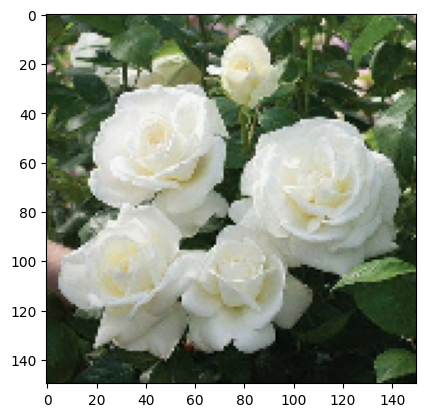

1/1 [==============================] - 0s 58ms/step
Hoa cúc


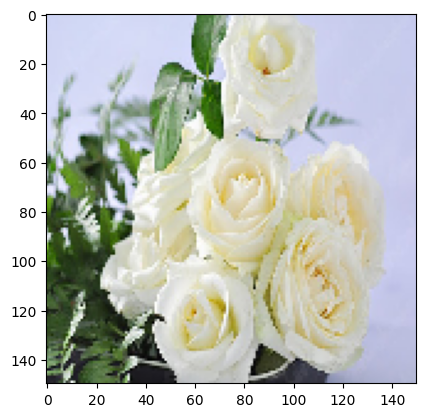

1/1 [==============================] - 0s 56ms/step
Hoa cúc


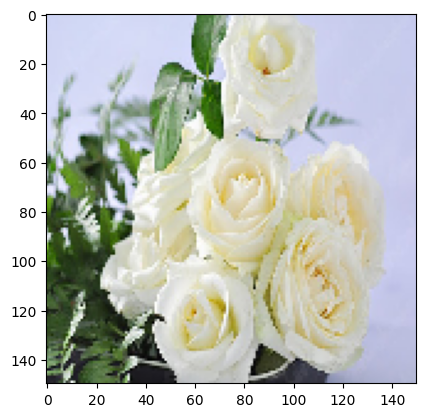

1/1 [==============================] - 0s 59ms/step
Hoa hồng


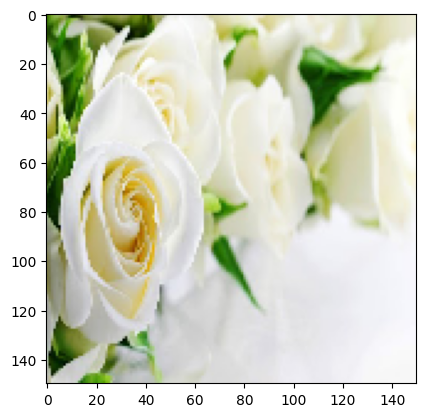

1/1 [==============================] - 0s 57ms/step
Hoa cúc


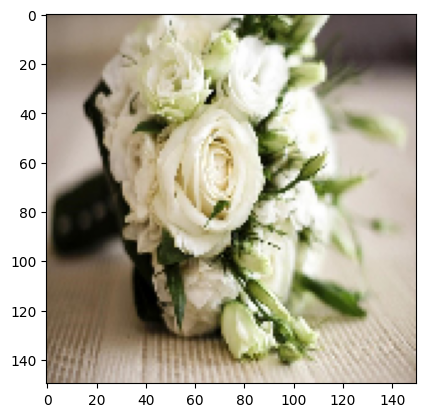

1/1 [==============================] - 0s 57ms/step
Hoa sen


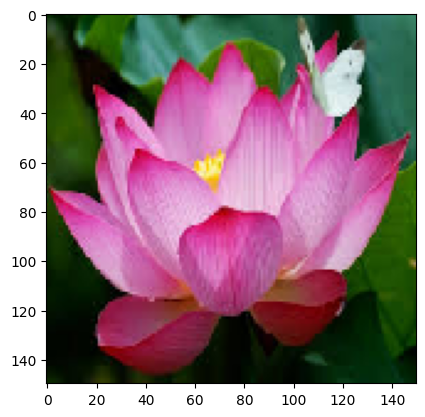

1/1 [==============================] - 0s 59ms/step
Hoa sen


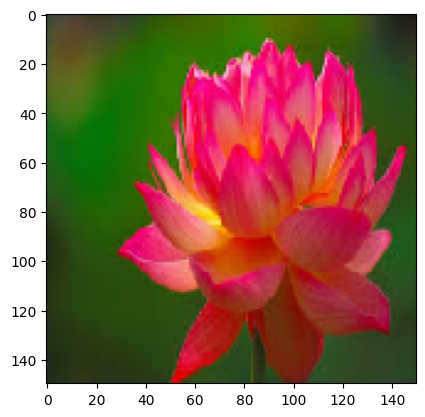

1/1 [==============================] - 0s 60ms/step
Hoa sen


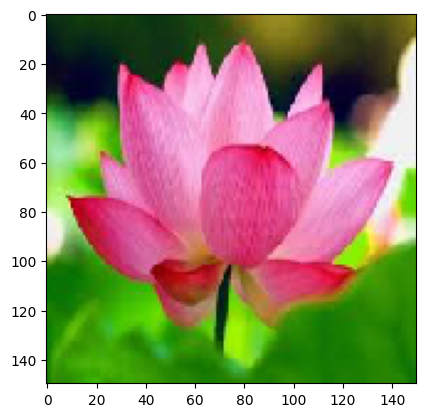

1/1 [==============================] - 0s 90ms/step
Hoa sen


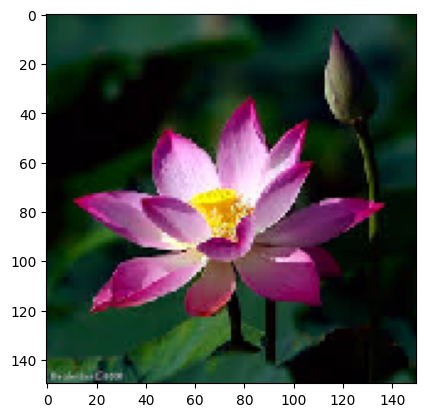

1/1 [==============================] - 0s 97ms/step
Hoa sen


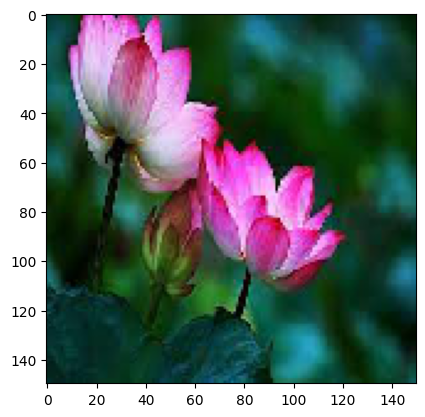

1/1 [==============================] - 0s 95ms/step
Hoa súng


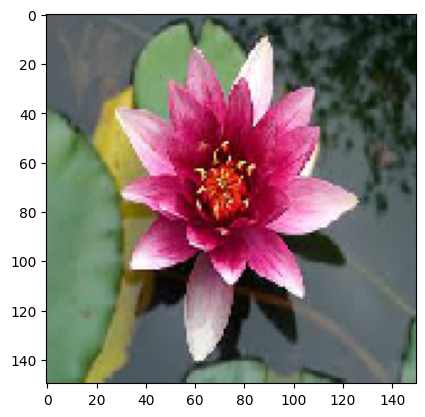

1/1 [==============================] - 0s 95ms/step
Hoa sen


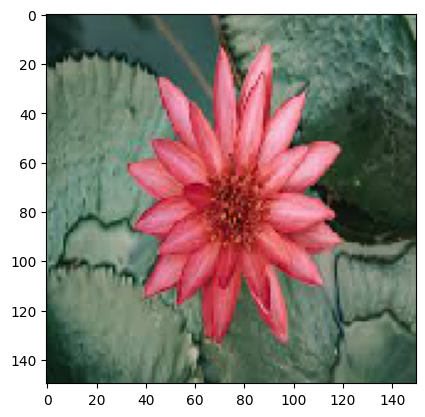

1/1 [==============================] - 0s 95ms/step
Hoa súng


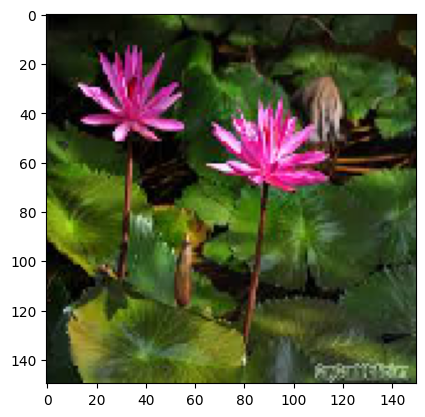

1/1 [==============================] - 0s 64ms/step
Hoa sen


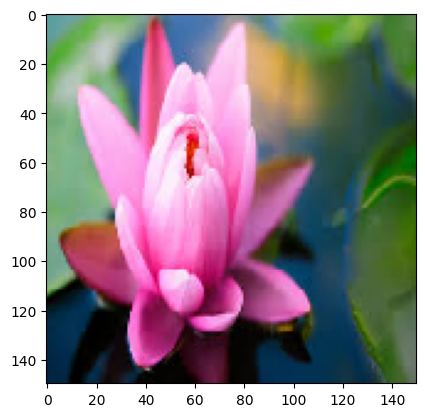

1/1 [==============================] - 0s 65ms/step
Hoa súng


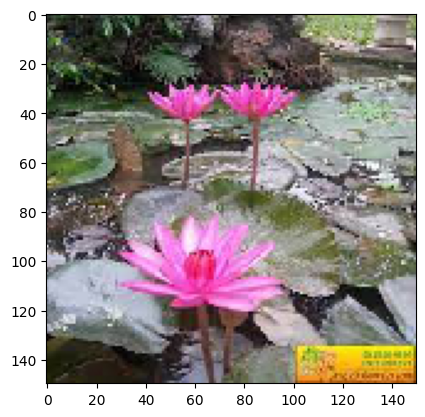

1/1 [==============================] - 0s 58ms/step
Hoa mai


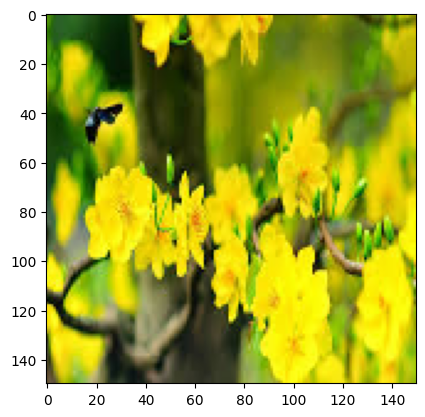

1/1 [==============================] - 0s 68ms/step
Hoa mai


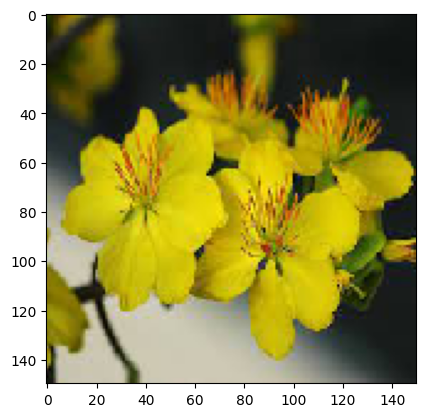

1/1 [==============================] - 0s 56ms/step
Hoa mai


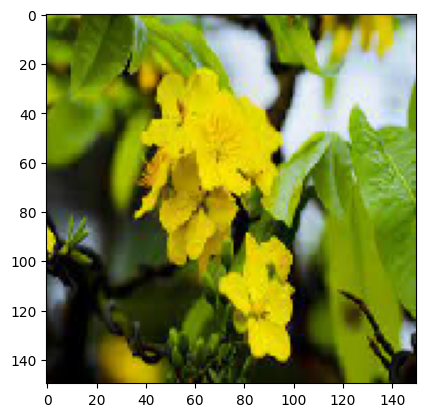

1/1 [==============================] - 0s 80ms/step
Hoa mai


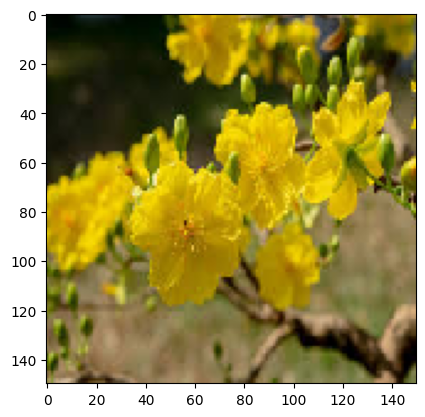

1/1 [==============================] - 0s 60ms/step
Hoa mai


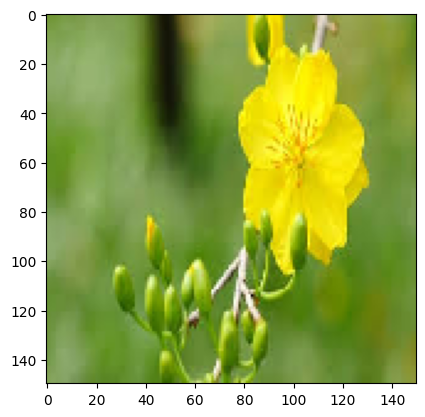

1/1 [==============================] - 0s 56ms/step
Hoa mai


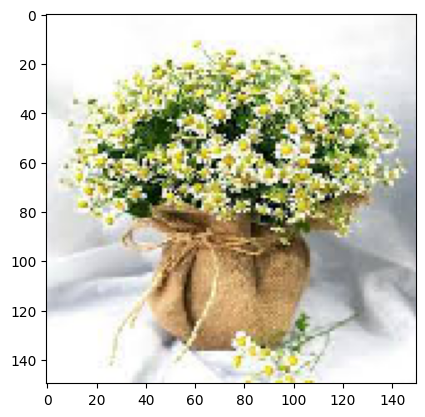

1/1 [==============================] - 0s 57ms/step
Hoa cúc


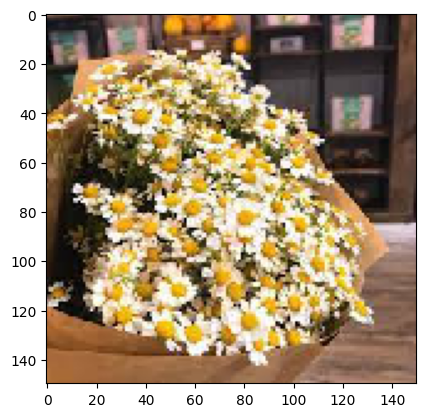

1/1 [==============================] - 0s 62ms/step
Hoa cúc


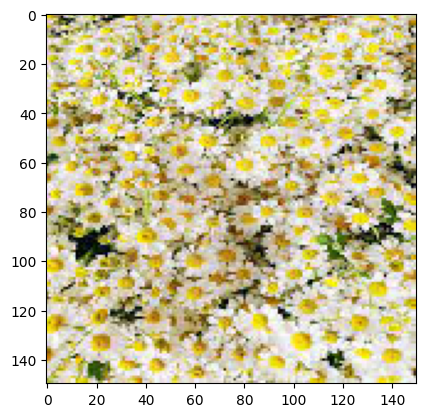

1/1 [==============================] - 0s 57ms/step
Hoa cúc


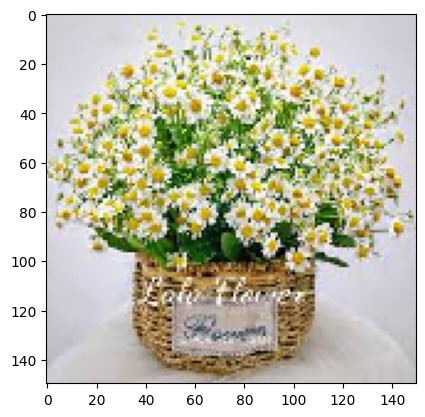

1/1 [==============================] - 0s 59ms/step
Hoa cúc


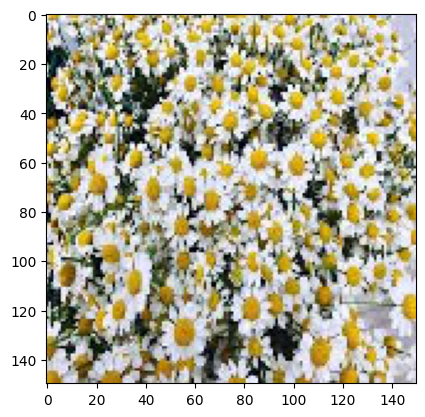

In [14]:
Test = "/content/drive/MyDrive/Colab Notebooks/Giữa kì/Hoa/Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Hoa cúc'
  if round(result[0][1])==1:
    prediction='Hoa hồng'
  if round(result[0][2])==1:
    prediction='Hoa mai'
  if round(result[0][3])==1:
    prediction='Hoa sen'
  if round(result[0][4])==1:
    prediction='Hoa súng'
  print(prediction)
  plt.show()

In [15]:
!jupyter nbconvert --to html "/content/Hoa.ipynb"

[NbConvertApp] Converting notebook /content/Hoa.ipynb to html
[NbConvertApp] Writing 7610562 bytes to /content/Hoa.html
